In [10]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data = model_data.dropna(subset=["PM2.5"])

,count,mean,std,min,25%,50%,75%,max
temperatura,3480.0,10.518793,8.077537,-17.3,4.1,10.40,17.400,28.2
suma opadów,3480.0,2.003764,5.200976,0.0,0.0,0.00,1.400,103.4
wilgotność,3480.0,74.791437,12.920208,35.5,65.5,76.30,84.800,99.0
prędkość wiatru,3480.0,1.774684,0.883196,0.0,1.3,1.70,2.300,6.7
zachmurzenine,3480.0,5.181236,2.320823,0.0,3.3,5.70,7.300,8.0
PM2.5,3480.0,26.734905,24.291744,1.8,12.5,18.71,31.135,279.3


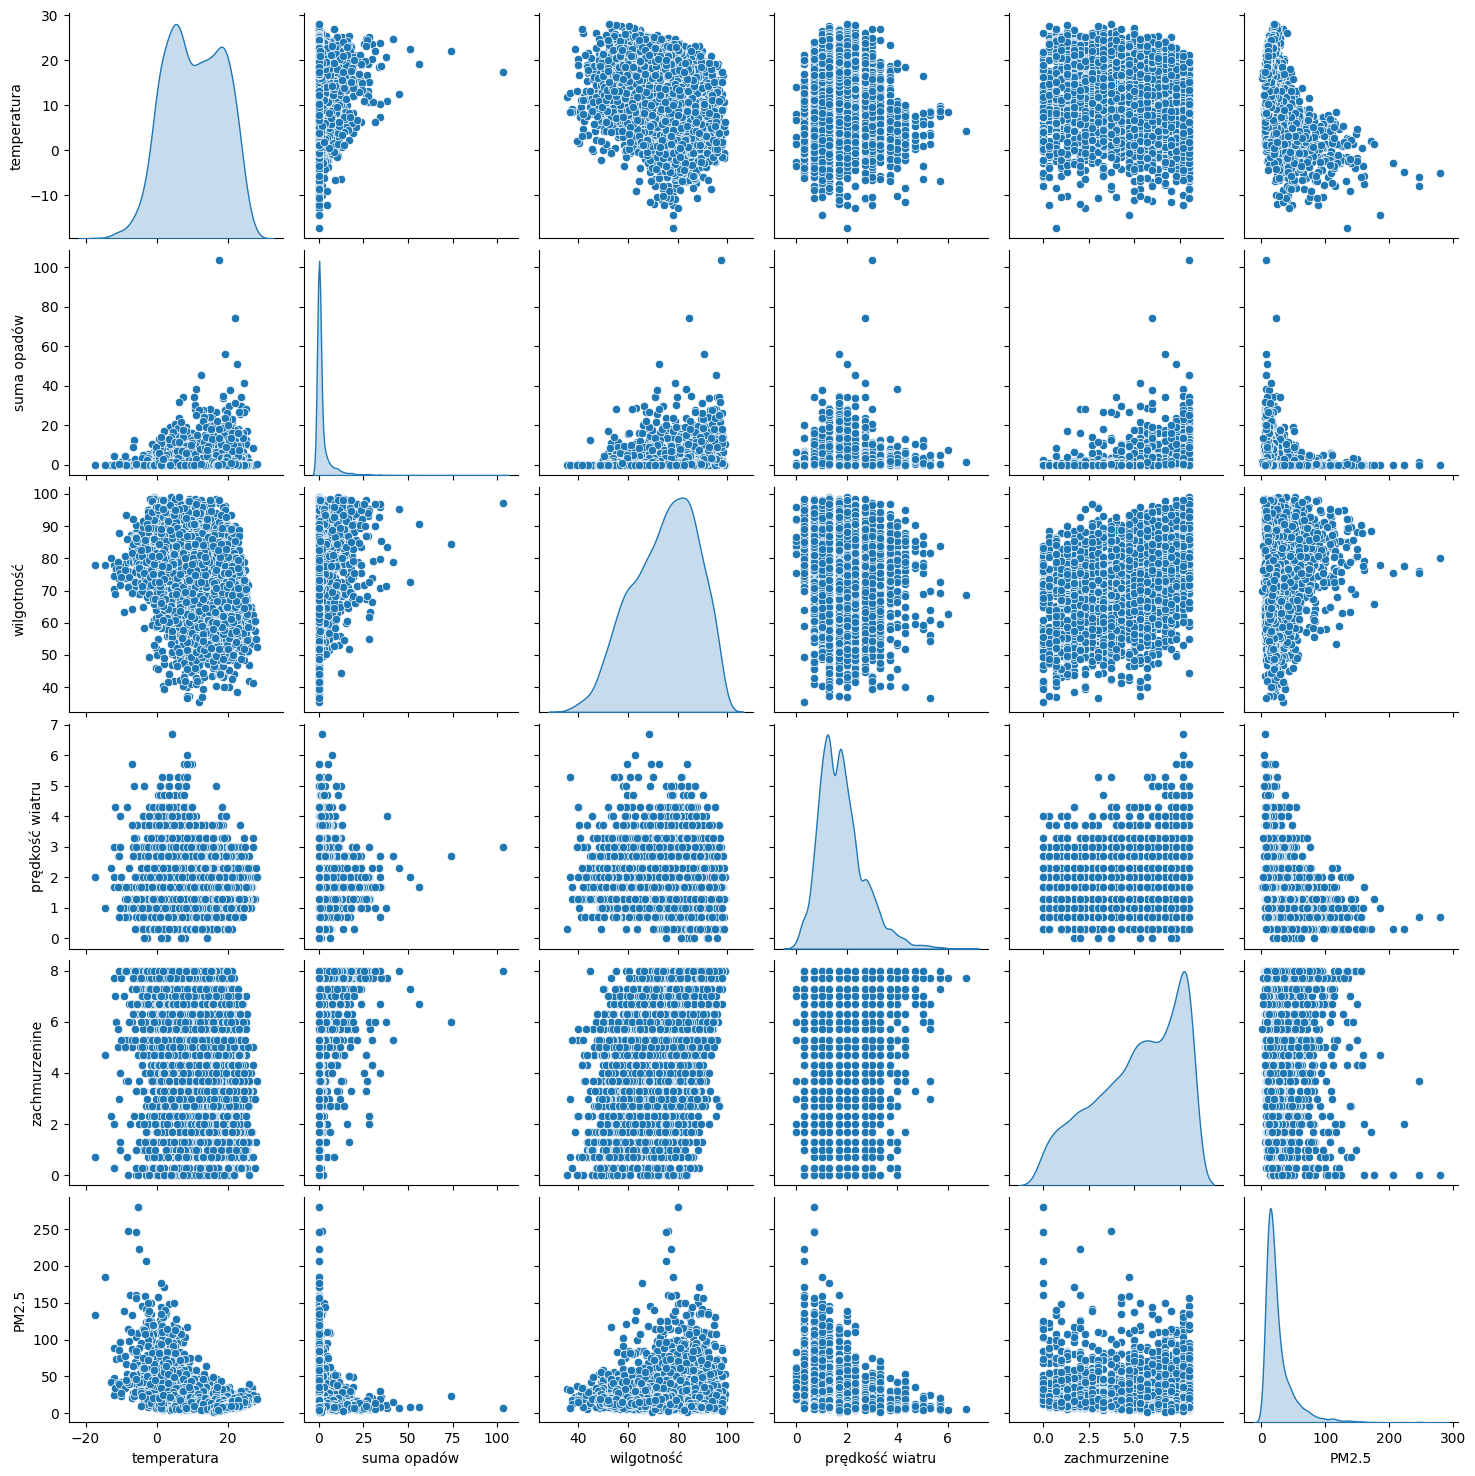

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

dataset = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine","PM2.5"]]
test_dataset = dataset.sample(frac=0.002, random_state=42)
train_dataset = dataset.drop(test_dataset.index)


sns.pairplot(train_dataset[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine","PM2.5"]], diag_kind='kde')
train_dataset.describe().transpose()

In [31]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))




def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()



history = dnn_model.fit(
    train_dataset,
    test_dataset,
    validation_split=0.2,
    verbose=0, epochs=100)
     

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_26 (Dense)            (None, 64)                448       
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4686 (18.31 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


ValueError: Data cardinality is ambiguous:
  x sizes: 2784
  y sizes: 7
Make sure all arrays contain the same number of samples.